In [13]:
import pandas as pd

df = pd.read_csv("data/ihdp.csv")
df.head()

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,False,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


In [14]:
df = df.rename(columns=str.lower)

features = [c for c in df.columns if c not in ["treatment", "y_factual", "y_cfactual"]]
X = df[features]
t = df["treatment"]
y = df["y_factual"]


# Manual DAG Creation


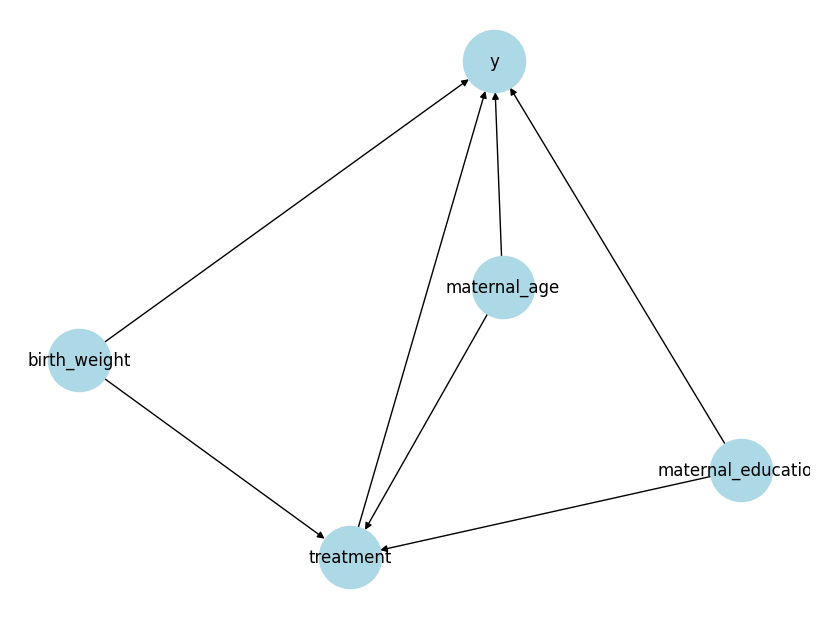

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

edges = [
    ("maternal_age", "treatment"),
    ("maternal_education", "treatment"),
    ("birth_weight", "treatment"),
    ("maternal_age", "y"),
    ("maternal_education", "y"),
    ("birth_weight", "y"),
    ("treatment", "y")
]

G.add_edges_from(edges)

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=2000)
plt.show()


# PC Algorithm


## Peter Clark Algorithm

The PC algorithm (named after its inventors Peter Spirtes and Clark Glymour) is a foundational constraint-based algorithm used for causal discovery. Its primary purpose is to infer a causal structure from observational data by identifying statistical dependencies and independencies between variables.

### How the Algorithm Works 

The PC algorithm operates in two major phases to build a Directed Acyclic Graph (DAG) or a Completed Partially Directed Acyclic Graph (CPDAG).

1. Skeleton Discovery:Starts with a fully connected undirected graph, where every variable is connected to every other variable.Iteratively performs conditional independence (CI) tests.

Removes an edge between variables \(X\) and \(Y\) if they are found to be independent, either marginally or conditioned on a set of other variables (the "separating set").

2. Edge Orientation:

Identifies v-structures (colliders): For three nodes \(X-Z-Y\) where \(X\) and \(Y\) are not connected, the edges are oriented as \(X\rightarrow Z\leftarrow Y\) if \(Z\) was not in the separating set that made \(X\) and \(Y\) independent.

Applies Meek's rules to orient the remaining undirected edges based on logic, such as avoiding the creation of new cycles or new v-structures.


Program Output:

1. Saved adjacency matrix to: adjacency_matrix.csv.
2. Saved adjacency matrix to: adjacency_matrix.npy.
3. Saved adjacency matrix to: adjacency_matrix.pkl.
4. Saved raw causal matrix to: causal_matrix_raw.csv.
5. Saved edge list to: edge_list.csv.

Total edges discovered: 59


NaN values: 0
Inf values: 0
Data shape: (747, 29)
Data dtype: float64


Depth=7, working on node 28: 100%|██████████| 29/29 [00:00<00:00, 2785.76it/s]



Causal Matrix:
           mu0  mu1  x1  x2  x3  x4  x5  x6  x7  x8  ...  x18  x19  x20  x21  \
mu0          0   -1   0   0   0   0   0   0   0   0  ...    0    0    0    0   
mu1          1    0   0   0   0   1   0  -1   0   0  ...    0    0    0    0   
x1           0    0   0  -1  -1   0   0   0   0   0  ...    0    0    0    0   
x2           0    0   1   0   1   0   0   0   1   0  ...    0    0    0    0   
x3           0    0   1  -1   0   0   1   0   0   0  ...    0    0    0    0   
x4           0   -1   0   0   0   0   0   1   0   0  ...    0    0    0    0   
x5           0    0   0   0  -1   0   0   0  -1   0  ...    0    0    0    0   
x6           0    1   0   0   0  -1   0   0   0   0  ...    0    0    0    0   
x7           0    0   0  -1   0   0  -1   0   0   0  ...    0    0    0    0   
x8           0    0   0   0   0   0   0   0   0   0  ...    0    0    0    0   
x9           0    0   0   0   0   0   0   1   0   0  ...    0    0    0    1   
x10          0   -1   0 

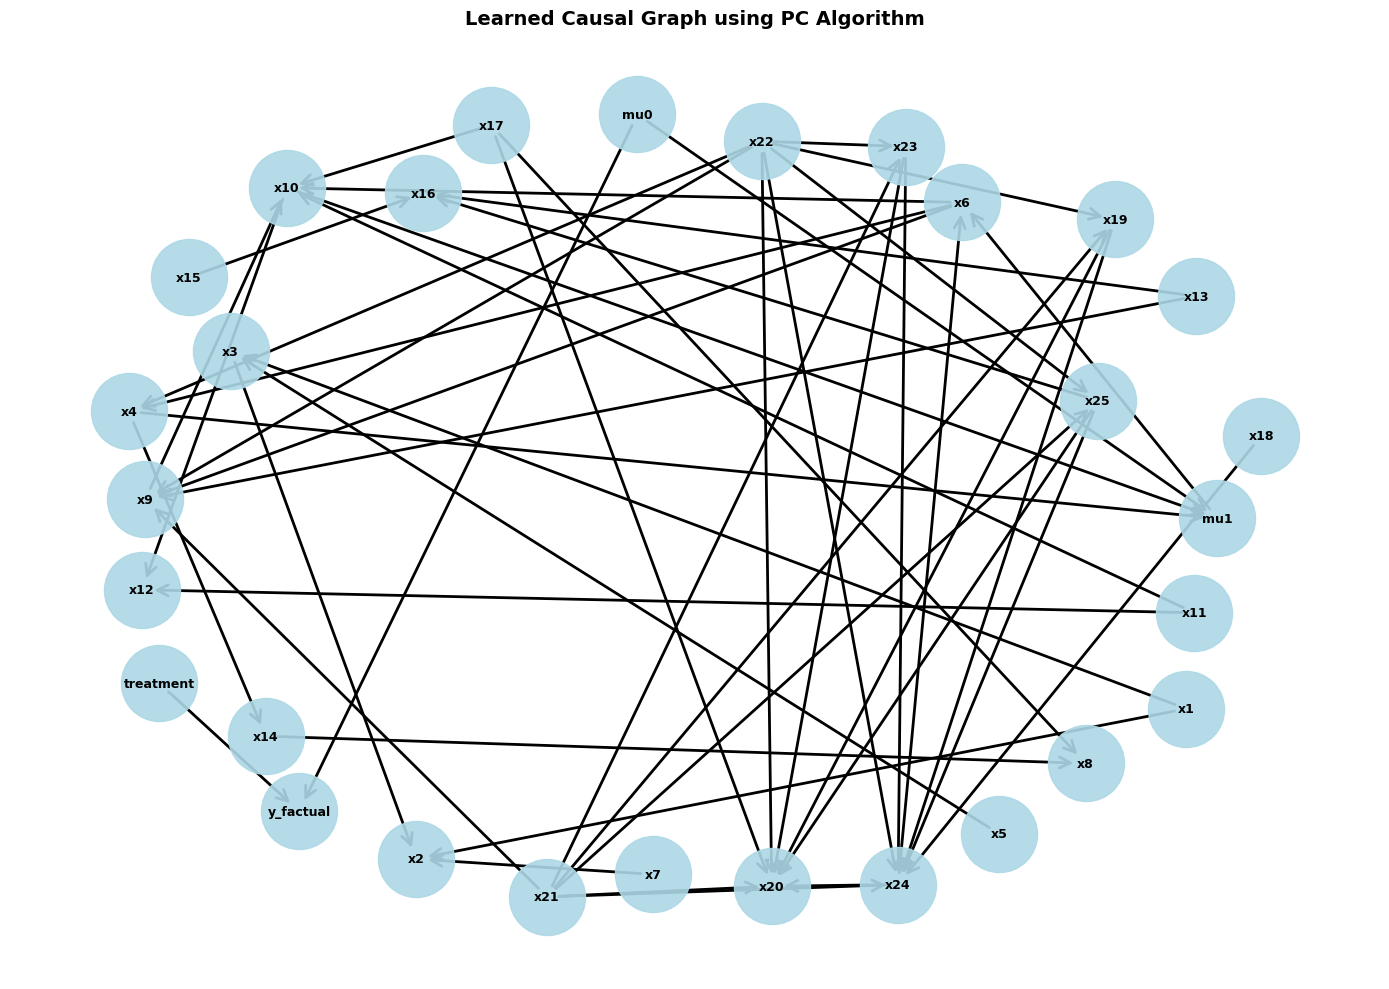


Discovered Causal Relationships:
--------------------------------------------------
mu0 → mu1
mu0 → y_factual
mu1 → x6
x4 → mu1
x4 → x14
x6 → x4
x6 → x9
x6 → x10
x10 → mu1
x10 → x12
x1 → x2
x1 → x3
x3 → x2
x7 → x2
x7 → x5
x5 → x3
x5 → x7
x14 → x8
x22 → x4
x22 → x9
x22 → x19
x22 → x20
x22 → x23
x22 → x24
x22 → x25
x9 → x10
x24 → x6
x24 → x20
x17 → x8
x17 → x10
x17 → x20
x13 → x9
x13 → x15
x13 → x16
x21 → x9
x21 → x19
x21 → x20
x21 → x23
x21 → x24
x21 → x25
x11 → x10
x11 → x12
x15 → x13
x15 → x16
x25 → x16
x25 → x20
x25 → x24
x25 → x19
x25 → x23
x18 → x24
x19 → x20
x19 → x23
x19 → x24
x19 → x25
x23 → x20
x23 → x19
x23 → x24
x23 → x25
treatment → y_factual


In [16]:
# %%
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz
import numpy as np

# Prepare data - ensure it's numeric and float type
data = df[features + ["treatment", "y_factual"]].astype(float).values
column_names = features + ["treatment", "y_factual"]

# Check for NaN or inf values
print(f"NaN values: {np.isnan(data).sum()}")
print(f"Inf values: {np.isinf(data).sum()}")

# Remove any rows with NaN or inf if they exist
if np.isnan(data).any() or np.isinf(data).any():
    mask = ~(np.isnan(data).any(axis=1) | np.isinf(data).any(axis=1))
    data = data[mask]
    print(f"Removed {(~mask).sum()} rows with NaN/Inf values")

print(f"Data shape: {data.shape}")
print(f"Data dtype: {data.dtype}")

# Run PC algorithm
cg = pc(data, alpha=0.05, indep_test=fisherz)

# Get the causal matrix
causal_matrix = cg.G.graph

# Create a DataFrame for better visualization
causal_df = pd.DataFrame(
    causal_matrix, 
    index=column_names, 
    columns=column_names
)

print("\nCausal Matrix:")
print(causal_df)

# %%
# Visualize the learned causal graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Interpret the causal matrix
# -1 means tail, 1 means arrowhead
# So if matrix[i,j] = -1 and matrix[j,i] = 1, then i -> j
for i, col_i in enumerate(column_names):
    for j, col_j in enumerate(column_names):
        if i != j:
            if causal_matrix[i, j] == -1 and causal_matrix[j, i] == 1:
                # i -> j (edge from i to j)
                G.add_edge(col_i, col_j)
            elif causal_matrix[i, j] == 1 and causal_matrix[j, i] == -1:
                # j -> i (edge from j to i)
                G.add_edge(col_j, col_i)
            elif causal_matrix[i, j] == -1 and causal_matrix[j, i] == -1:
                # i - j (undirected edge)
                G.add_edge(col_i, col_j, style='dashed')

plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=3, iterations=50, seed=42)

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color="lightblue", 
                       node_size=3000, alpha=0.9)
nx.draw_networkx_labels(G, pos, font_size=9, font_weight="bold")

# Draw directed edges
edges = [(u, v) for (u, v, d) in G.edges(data=True) if 'style' not in d]
nx.draw_networkx_edges(G, pos, edgelist=edges, 
                       arrowsize=20, arrowstyle='->', 
                       edge_color='black', width=2)

plt.title("Learned Causal Graph using PC Algorithm", fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

# %%
# Print edges for easier interpretation
print("\nDiscovered Causal Relationships:")
print("-" * 50)
for u, v in G.edges():
    print(f"{u} → {v}")

[2025-12-31 12:44:28,617][linear.py - line 195] - INFO - [start]: n=747, d=29, iter_=100, h_=1e-08, rho_=1e+16
[2025-12-31 12:44:28,655][linear.py - line 206] - INFO - [iter 0] h=2.314e-01, loss=7.794, rho=1.0e+00
[2025-12-31 12:44:28,682][linear.py - line 206] - INFO - [iter 1] h=1.613e-01, loss=4.522, rho=1.0e+00
[2025-12-31 12:44:28,720][linear.py - line 206] - INFO - [iter 1] h=7.754e-02, loss=4.763, rho=1.0e+01
[2025-12-31 12:44:28,770][linear.py - line 206] - INFO - [iter 1] h=2.637e-02, loss=7.171, rho=1.0e+02
[2025-12-31 12:44:28,808][linear.py - line 206] - INFO - [iter 2] h=1.619e-02, loss=4.710, rho=1.0e+02
[2025-12-31 12:44:28,868][linear.py - line 206] - INFO - [iter 2] h=6.981e-03, loss=5.023, rho=1.0e+03
[2025-12-31 12:44:28,944][linear.py - line 206] - INFO - [iter 2] h=2.255e-03, loss=8.151, rho=1.0e+04
[2025-12-31 12:44:29,013][linear.py - line 206] - INFO - [iter 3] h=1.156e-03, loss=4.851, rho=1.0e+04
[2025-12-31 12:44:29,108][linear.py - line 206] - INFO - [iter 3]

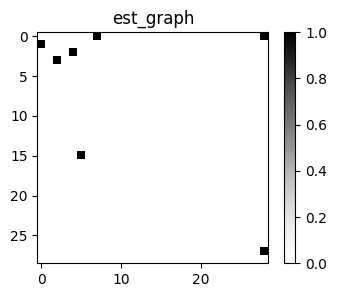

In [20]:
from castle.algorithms import Notears
from castle.common import GraphDAG

notears = Notears()
notears.learn(data)

GraphDAG(notears.causal_matrix,show=True)